In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [13]:
df = pd.read_csv('results/N100-F1000-S100-R100-result-v8.csv')
df.describe()

,correlation,load,value,disturbance,actual_load
count,31500.00000,31500.000000,27901.000000,31500.000000,3.150000e+04
mean,0.50000,0.800000,16.734450,0.141754,1.201572e+06
std,0.30277,0.070712,18.063215,0.038126,5.712530e+04
min,0.00000,0.700000,3.267663,0.009537,9.828122e+05
25%,0.25000,0.750000,8.697770,0.123886,1.176020e+06
50%,0.50000,0.800000,11.116232,0.150078,1.200736e+06
75%,0.75000,0.850000,14.024994,0.171841,1.228665e+06
max,1.00000,0.900000,92.867079,0.199762,1.443041e+06


In [14]:
vals = df.drop(['disturbance', 'actual_load'], axis=1).groupby(['algorithm', 'correlation', 'load']).mean()
vals = vals.unstack(0)
vals.reset_index(inplace=True)
vals.head()

correlation  load      value                      
algorithm                           BF         RR       SALP
0                 0.0  0.70   4.244327   4.447232   3.615472
1                 0.0  0.75   5.988466   6.258306   5.365057
2                 0.0  0.80   8.281010  10.598768   7.830861
3                 0.0  0.85  11.186261  39.122985  11.013281
4                 0.0  0.90  14.737573        NaN  52.076446

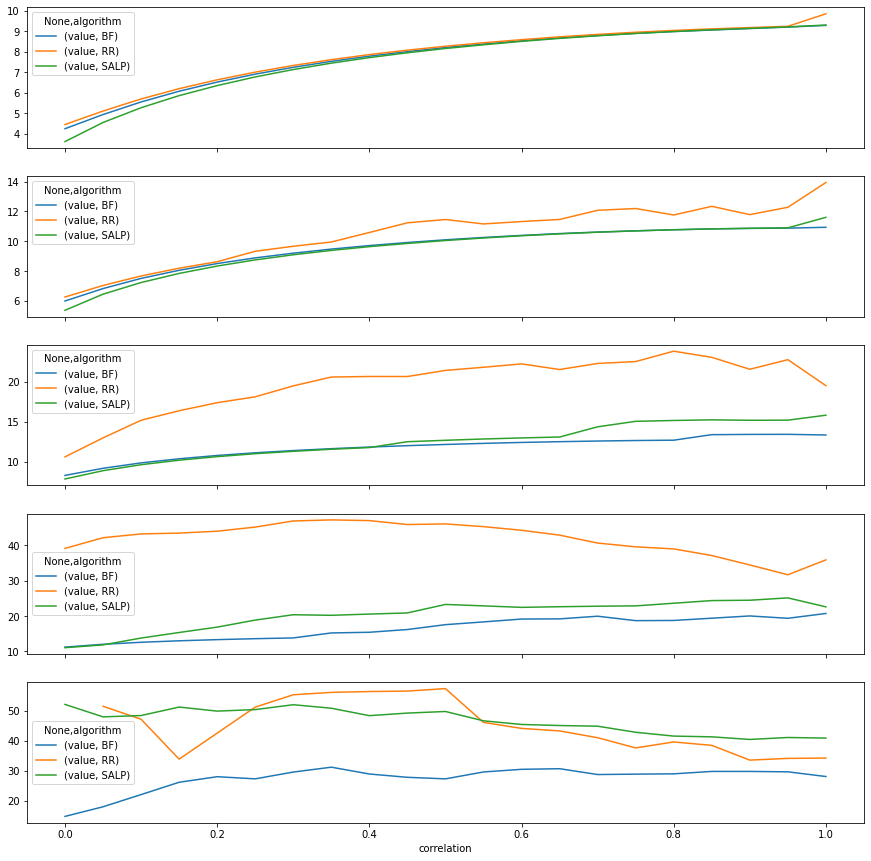

In [15]:
loads = vals['load'].unique()
fig, axes = plt.subplots(loads.size, 1, figsize=(15,15), sharex=True)
for i in range(loads.size):
    vals[vals['load']==loads[i]].drop('load', axis=1).plot(x='correlation', ax=axes[i], legend=True)
plt.show()

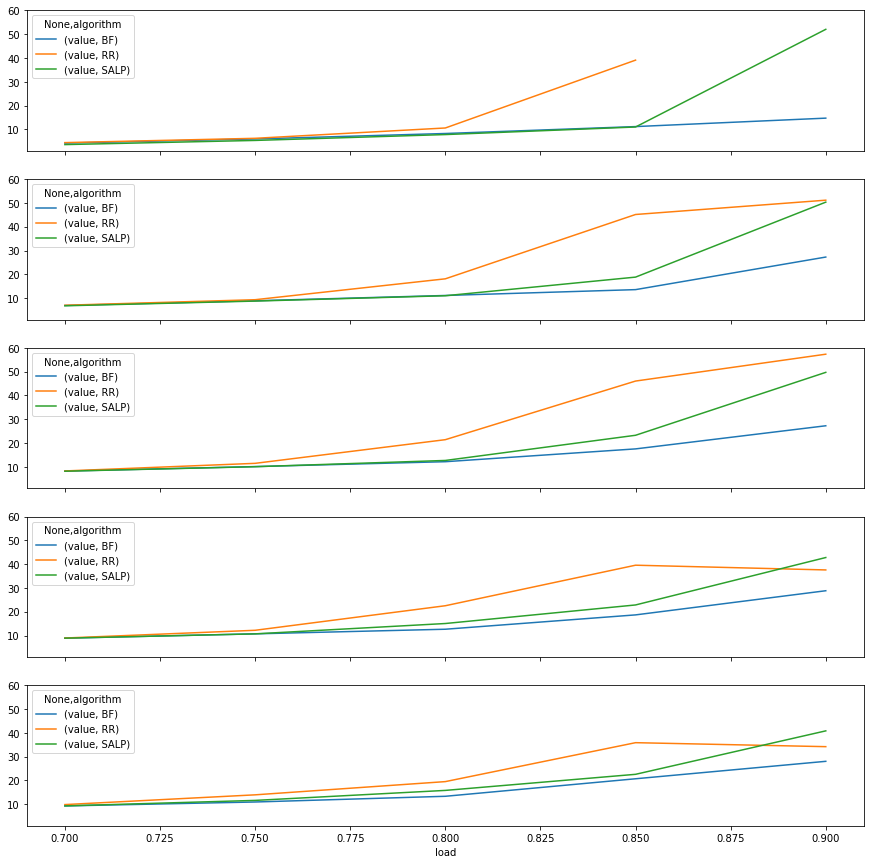

In [16]:
cors = np.array([0,.25,.5,.75,1])
fig, axes = plt.subplots(loads.size, 1, figsize=(15,15), sharex=True, sharey=True)
for i in range(cors.size):
    vals[vals['correlation']==cors[i]].drop('correlation', axis=1).plot(x='load', ax=axes[i], legend=True)
plt.show()

In [17]:
df.groupby(['algorithm', 'load']).count()

correlation  value  disturbance  actual_load
algorithm load                                              
BF        0.70         2100   2100         2100         2100
          0.75         2100   2100         2100         2100
          0.80         2100   2099         2100         2100
          0.85         2100   2082         2100         2100
          0.90         2100   1922         2100         2100
RR        0.70         2100   2100         2100         2100
          0.75         2100   2082         2100         2100
          0.80         2100   1958         2100         2100
          0.85         2100   1251         2100         2100
          0.90         2100    247         2100         2100
SALP      0.70         2100   2100         2100         2100
          0.75         2100   2100         2100         2100
          0.80         2100   2097         2100         2100
          0.85         2100   2024         2100         2100
          0.90         2100   1639         2100         2100

In [18]:
dist = df.drop(['value', 'actual_load'], axis=1).groupby(['algorithm', 'correlation', 'load']).mean()
dist = dist.unstack(0)
dist.reset_index(inplace=True)
dist.head()

correlation  load disturbance                    
algorithm                            BF        RR      SALP
0                 0.0  0.70    0.178563  0.186044  0.156411
1                 0.0  0.75    0.178563  0.186044  0.156411
2                 0.0  0.80    0.178563  0.186044  0.156411
3                 0.0  0.85    0.178563  0.186044  0.156411
4                 0.0  0.90    0.178563  0.186044  0.156411

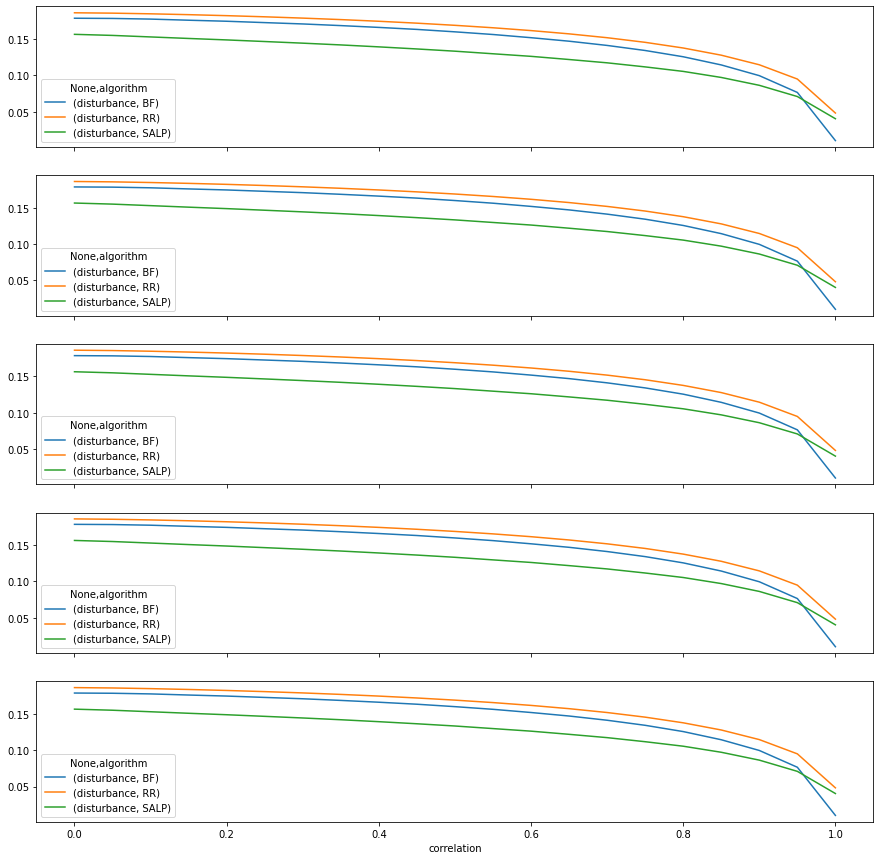

In [19]:
loads = vals['load'].unique()
fig, axes = plt.subplots(loads.size, 1, figsize=(15,15), sharex=True)
for i in range(loads.size):
    dist[dist['load']==loads[i]].drop('load', axis=1).plot(x='correlation', ax=axes[i], legend=True)
plt.show()

In [20]:
acld = df.drop(['algorithm', 'value', 'disturbance'], axis=1).groupby(['correlation', 'load']).mean()
# acld = acld.unstack(0)
acld.reset_index(inplace=True)
acld.head()

,correlation,load,actual_load
0,0.0,0.70,1.199534e+06
1,0.0,0.75,1.199534e+06
2,0.0,0.80,1.199534e+06
3,0.0,0.85,1.199534e+06
4,0.0,0.90,1.199534e+06


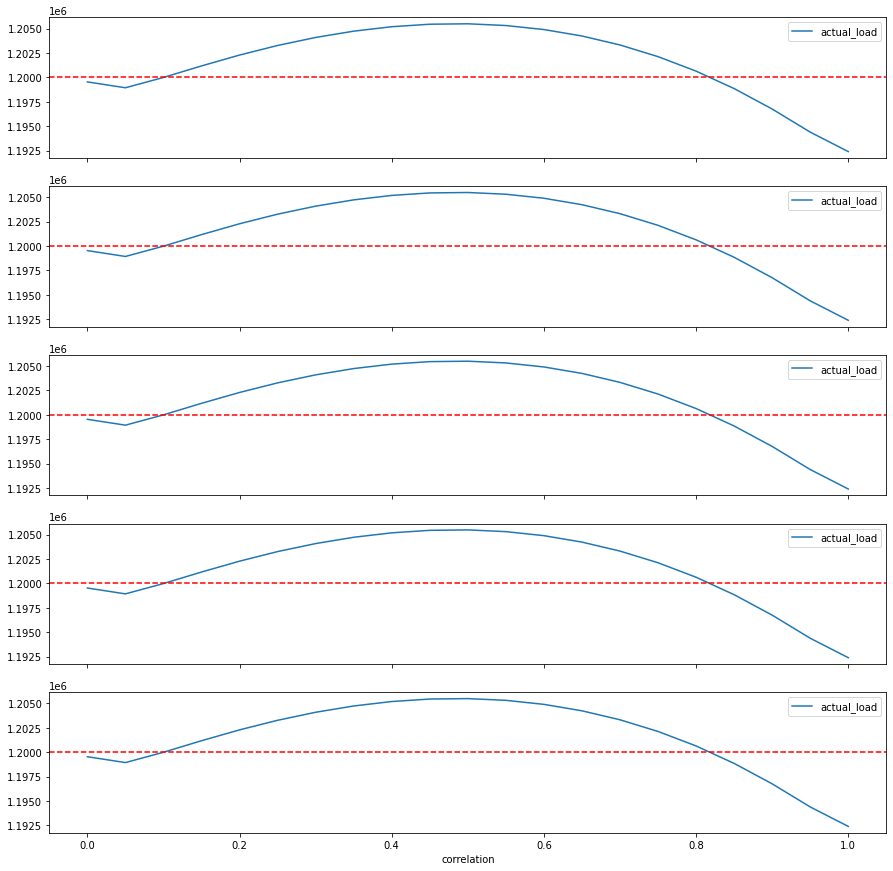

In [21]:
est = 1.2 * 10**6
loads = acld['load'].unique()
fig, axes = plt.subplots(loads.size, 1, figsize=(15,15), sharex=True)
for i in range(loads.size):
    acld[acld['load']==loads[i]].drop('load', axis=1).plot(x='correlation', ax=axes[i], legend=True)
    axes[i].axhline(est,color='red',ls='--')
plt.show()

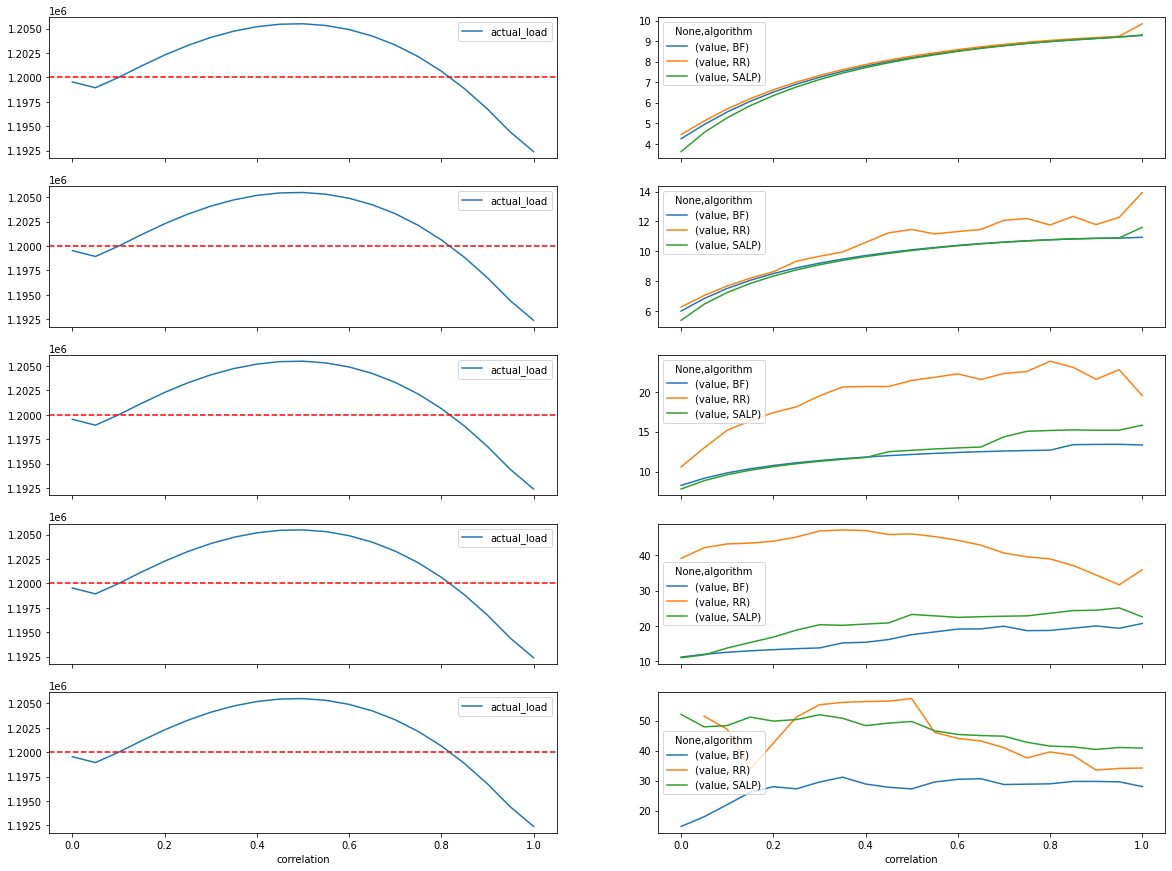

In [22]:
loads = acld['load'].unique()
fig, axes = plt.subplots(loads.size, 2, figsize=(20,15), sharex=True)
for i in range(loads.size):
    acld[acld['load']==loads[i]].drop('load', axis=1).plot(x='correlation', ax=axes[i][0], legend=True)
    axes[i][0].axhline(est,color='red',ls='--', label="estimated")
    vals[vals['load']==loads[i]].drop('load', axis=1).plot(x='correlation', ax=axes[i][1], legend=True)

plt.show()